In [107]:
#Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

file_path = "Resources/COVID_final_data.csv"


data = pd.read_csv(file_path)

data

,Unnamed: 0,Country,Country Code,Cases,Deaths,Population 2019,"Cases per 100,000 People","Deaths per 100,000 People",2017 GDP in Billions,2018 GDP in Billions,2019 GDP in Billions,Capital,Latitude
0,0,Afghanistan,AFG,39616,1470,38041757.0,104.14,3.86,20.191760,19.484385,19.101354,Kabul,34.5167
1,1,Albania,ALB,14730,407,2862427.0,514.60,14.22,13.019693,15.147021,15.278077,Tirana,41.3275
2,2,Algeria,DZA,52520,1779,43053054.0,121.99,4.13,167.389000,173.758000,169.988000,Algiers,36.7631
3,3,Andorra,AND,2568,53,76177.0,3371.10,69.57,3.000181,3.218316,3.154058,Andorra la Vella,42.5
4,4,Angola,AGO,5725,211,31825299.0,17.99,0.66,122.124000,101.353000,94.635416,Luanda,-8.8383
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,194,"Venezuela, RB",VEN,80404,671,28515829.0,281.96,2.35,0.000000,0.000000,0.000000,Caracas,10.501
195,195,Vietnam,VNM,1099,35,96462108.0,1.14,0.04,223.780000,245.214000,261.921000,Hanoi,21.0333
196,196,"Yemen, Rep.",YEM,2053,594,29161922.0,7.04,2.04,24.561328,27.591262,0.000000,Sanaa,15.3547
197,197,Zambia,ZMB,15224,334,17861034.0,85.24,1.87,25.868142,27.005239,23.064722,Lusaka,-15.4166


In [92]:
example = data[data['Country'].isin(['Afghanistan'])]
example['Latitude'].dtype

dtype('O')

In [56]:
# Running my own analysis on Question 1 to see potential trends (Lat vs Cases and Deaths)
latitude_data = data[['Country', 'Latitude', 'Cases', 'Deaths', ]]
# Remove 'Not Available' string for Latitude column
latitude_clean = latitude_grouped[~latitude_grouped['Latitude'].isin(['Not Available'])]
latitude_clean['Latitude'] = latitude_clean['Latitude'].astype(float)
# Reset Index
latitude_reset = latitude_clean.reset_index()
latitude_final = latitude_reset.sort_values('Country', ascending=True)
latitude_final.head()

C:\Users\marti\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,index,Country,Latitude,Cases,Deaths
79,0,Afghanistan,34.5167,39616,1470
57,1,Albania,41.3275,14730,407
74,2,Algeria,36.7631,52520,1779
52,3,Andorra,42.5000,2568,53
152,4,Angola,-8.8383,5725,211


In [57]:
# Determining Stats
max_cases = latitude_final['Cases'].max()
min_cases = latitude_final['Cases'].min()
max_deaths = latitude_final['Deaths'].max()
min_deaths = latitude_final['Deaths'].min()
max_lat = latitude_final['Latitude'].max()
min_lat = latitude_final['Latitude'].min()
print(f'Max/Min Cases: {max_cases}, {min_cases}')
print(f'Max/Min Deaths: {max_deaths}, {min_deaths}')
print(f'Max/Min Lat: {max_lat}, {min_lat}')

Max/Min Cases: 7549794, 19
Max/Min Deaths: 211801, 0
Max/Min Lat: 64.15, -41.3


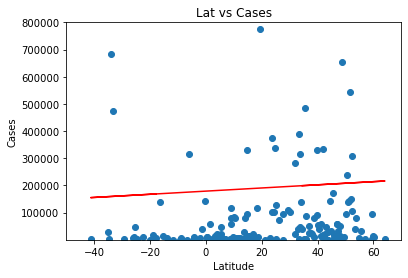

In [110]:
# Scatter Plot Variables
case_data = latitude_final['Cases']
death_data = latitude_final['Deaths']
lat = latitude_final['Latitude']

# Lat vs Cases Scatter Plot
x_values = lat
y_values = case_data
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlim(-50,70)
plt.ylim(100,800000)
plt.xlabel("Latitude")
plt.ylabel("Cases")
plt.title("Lat vs Cases")
plt.show()

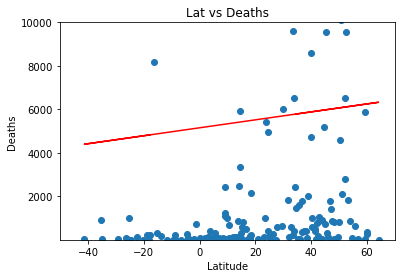

In [111]:
# Scatter Plot Deaths vs Latitude from Random Sample
x_values = lat
y_values = death_data
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlim(-50,70)
plt.ylim(10,10000)
plt.xlabel("Latitude")
plt.ylabel("Deaths")
plt.title("Lat vs Deaths")
plt.show()

In [ ]:
# GDP Analysis 